In [125]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import scipy.stats

%config InlineBackend.figure_format = 'retina'

In [1]:
data_dir = '/Volumes/clmnlab/GA/fmri_data/preproc_data/'
restdata_dir = '/Volumes/clmnlab/GA/Connectivity/data/rest_preproc/'

ga_subj_list = [
    'GA01', 'GA02', 'GA05', 'GA07', 'GA08', 'GA11', 'GA12', 'GA13', 'GA14', 'GA15',
    'GA18', 'GA19', 'GA20', 'GA21', 'GA23', 'GA26', 'GA27', 'GA28', 'GA29', 'GA30',
    'GA31', 'GA32', 'GA33', 'GA34', 'GA35', 'GA36', 'GA37', 'GA38', 'GA42', 'GA44'
]

gb_subj_list = [subj.replace('A', 'B') for subj in ga_subj_list]

subj_list = ga_subj_list + gb_subj_list

# censor count

In [4]:
censor_count = {}

for subj in subj_list:
    for run in range(1, 7):
        with open(data_dir + '%s/motion_%s.r0%d_censor.1D' % (subj, subj, run), 'r') as file:
            temp = file.readlines()

        temp = [int(i.strip()) for i in temp]
        censor_count[subj, run] = np.sum(np.array(temp) == 0)

    try:
        with open(restdata_dir + '%s/motion_%s.rest_censor.1D' % (subj, subj), 'r') as file:
            temp = file.readlines()
            
        temp = [int(i.strip()) for i in temp]
        censor_count[subj, 'rest'] = np.sum(np.array(temp) == 0)
    except FileNotFoundError:
        continue

In [5]:
import numpy as np

results = []

for subj in subj_list:
    for run in [1, 2, 3, 4, 5, 6, 'rest']:
        try:
            count = censor_count[subj, run]
        except Exception:
            count = float('NaN')
            
        results.append([subj, run, count])

In [6]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(results, columns=['subject', 'run', 'count'])

In [7]:
df[df['subject'] == 'GB11']

,subject,run,count
245,GB11,1,0.0
246,GB11,2,4.0
247,GB11,3,7.0
248,GB11,4,8.0
249,GB11,5,0.0
250,GB11,6,10.0
251,GB11,rest,NaN


(1, 10)

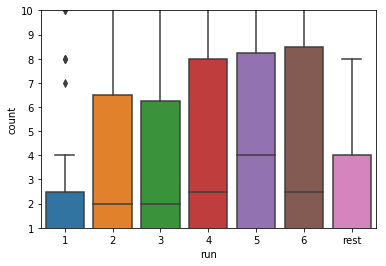

In [45]:
import matplotlib.pyplot as plt

sns.boxplot(x='run', y='count', data=df)
plt.ylim(1, 10)

In [19]:
df[df['count'] > 40]

,subject,run,count
36,GA11,2,56.0
96,GA21,6,71.0
100,GA23,3,69.0
102,GA23,5,68.0
103,GA23,6,51.0
241,GB08,4,47.0
242,GB08,5,101.0
243,GB08,6,48.0
308,GB23,1,107.0
309,GB23,2,238.0


In [22]:
censor_count_entire_volume = {}

for subj in ga_subj_list:
    censor_count_entire_volume[subj] = 0
    
    for run in range(1, 6):
        censor_count_entire_volume[subj] += censor_count[subj, run]
        censor_count_entire_volume[subj] += censor_count[subj.replace('A', 'B'), run]

In [26]:
ratio_excluded_volumes = [(key, val / (1096*12) * 100) for key, val in censor_count_entire_volume.items()]
ratio_excluded_volumes

[('GA01', 0.16727493917274938),
 ('GA02', 0.03801703163017032),
 ('GA05', 0.09124087591240876),
 ('GA07', 0.6006690997566909),
 ('GA08', 1.1405109489051095),
 ('GA11', 0.9276155717761558),
 ('GA12', 0.5702554744525548),
 ('GA13', 0.22810218978102187),
 ('GA14', 0.16727493917274938),
 ('GA15', 0.030413625304136254),
 ('GA18', 0.5778588807785888),
 ('GA19', 0.22810218978102187),
 ('GA20', 0.21289537712895376),
 ('GA21', 1.3762165450121655),
 ('GA23', 5.360401459854015),
 ('GA26', 0.11405109489051093),
 ('GA27', 0.28132603406326034),
 ('GA28', 0.48661800486618007),
 ('GA29', 0.0),
 ('GA30', 0.6158759124087592),
 ('GA31', 1.2621654501216546),
 ('GA32', 0.09124087591240876),
 ('GA33', 0.09124087591240876),
 ('GA34', 0.1444647201946472),
 ('GA35', 0.015206812652068127),
 ('GA36', 2.022506082725061),
 ('GA37', 0.0),
 ('GA38', 0.10644768856447688),
 ('GA42', 0.07603406326034064),
 ('GA44', 0.36496350364963503)]

In [28]:
np.mean([val for subj, val in ratio_excluded_volumes]), np.std([val for subj, val in ratio_excluded_volumes])

(0.5796330089213301, 1.0087243356215816)

# enorm data

In [29]:
enorm_data = {}

for subj in ga_subj_list:
    for run in range(7):
        with open(data_dir + '%s/motion_%s.r0%d_enorm.1D' % (subj, subj, run), 'r') as file:
            temp = file.readlines()

        temp = [float(i.strip()) for i in temp]
        enorm_data[subj, run] = temp
            
    with open(restdata_dir + '%s/motion_%s.rest_enorm.1D' % (subj, subj), 'r') as file:
        temp = file.readlines()
    
    temp = [float(i.strip()) for i in temp]
    enorm_data[subj, 'rest'] = temp
        
    subj = subj.replace('A', 'B')
    
    for run in range(1, 7):
        with open(data_dir + '%s/motion_%s.r0%d_enorm.1D' % (subj, subj, run), 'r') as file:
            temp = file.readlines()

        temp = [float(i.strip()) for i in temp]
        enorm_data[subj, run] = temp


In [47]:
lines = []

for subj in ga_subj_list:
    lines.append((subj, '0 rest', np.mean(enorm_data[subj, 'rest'])))
    
    for run in [1, 2, 3]:
        lines.append((subj, '1 early-trained (run %d)' % run, np.mean(enorm_data[subj, run])))
        
    for run in [4, 5, 6]:
        lines.append((subj, '2 early-untrained (run %d)' % run, np.mean(enorm_data[subj, run])))
    
    for run in [1, 2, 3]:
        lines.append((subj, '3 late-trained (run %d)' % run, np.mean(enorm_data[subj.replace('A', 'B'), run])))
        
    for run in [4, 5, 6]:
        lines.append((subj, '4 late-untrained (run %d)' % run, np.mean(enorm_data[subj.replace('A', 'B'), run])))

In [48]:
df = pd.DataFrame(lines, columns=['subject', 'Stage', 'Head movement between image acquisition'])
df.tail()

,subject,Stage,Head movement between image acquisition
385,GA44,3 late-trained (run 2),0.047846
386,GA44,3 late-trained (run 3),0.041550
387,GA44,4 late-untrained (run 4),0.057358
388,GA44,4 late-untrained (run 5),0.050529
389,GA44,4 late-untrained (run 6),0.051875


In [49]:
palette = ['#F8BA00',
           '#00A8AA', '#00A8AA', '#00A8AA', '#C5C7D2', '#C5C7D2', '#C5C7D2',
           '#00A8AA', '#00A8AA', '#00A8AA', '#C5C7D2', '#C5C7D2', '#C5C7D2']

In [51]:
import matplotlib

matplotlib.rcParams['font.sans-serif'] = "Arial"

In [73]:
xticklabels = [
    'Rest',
    'Run 1', 'Run 2', 'Run 3',
    'Run 4', 'Run 5', 'Run 6',
    'Run 1', 'Run 2', 'Run 3',
    'Run 4', 'Run 5', 'Run 6',
]

In [99]:
df.groupby(['Stage']).mean()['Head movement between image acquisition']

Stage
0 rest                       0.062274
1 early-trained (run 1)      0.072492
1 early-trained (run 2)      0.076877
1 early-trained (run 3)      0.079065
2 early-untrained (run 4)    0.078309
2 early-untrained (run 5)    0.078644
2 early-untrained (run 6)    0.079410
3 late-trained (run 1)       0.066568
3 late-trained (run 2)       0.069490
3 late-trained (run 3)       0.067762
4 late-untrained (run 4)     0.073379
4 late-untrained (run 5)     0.078240
4 late-untrained (run 6)     0.073510
Name: Head movement between image acquisition, dtype: float64

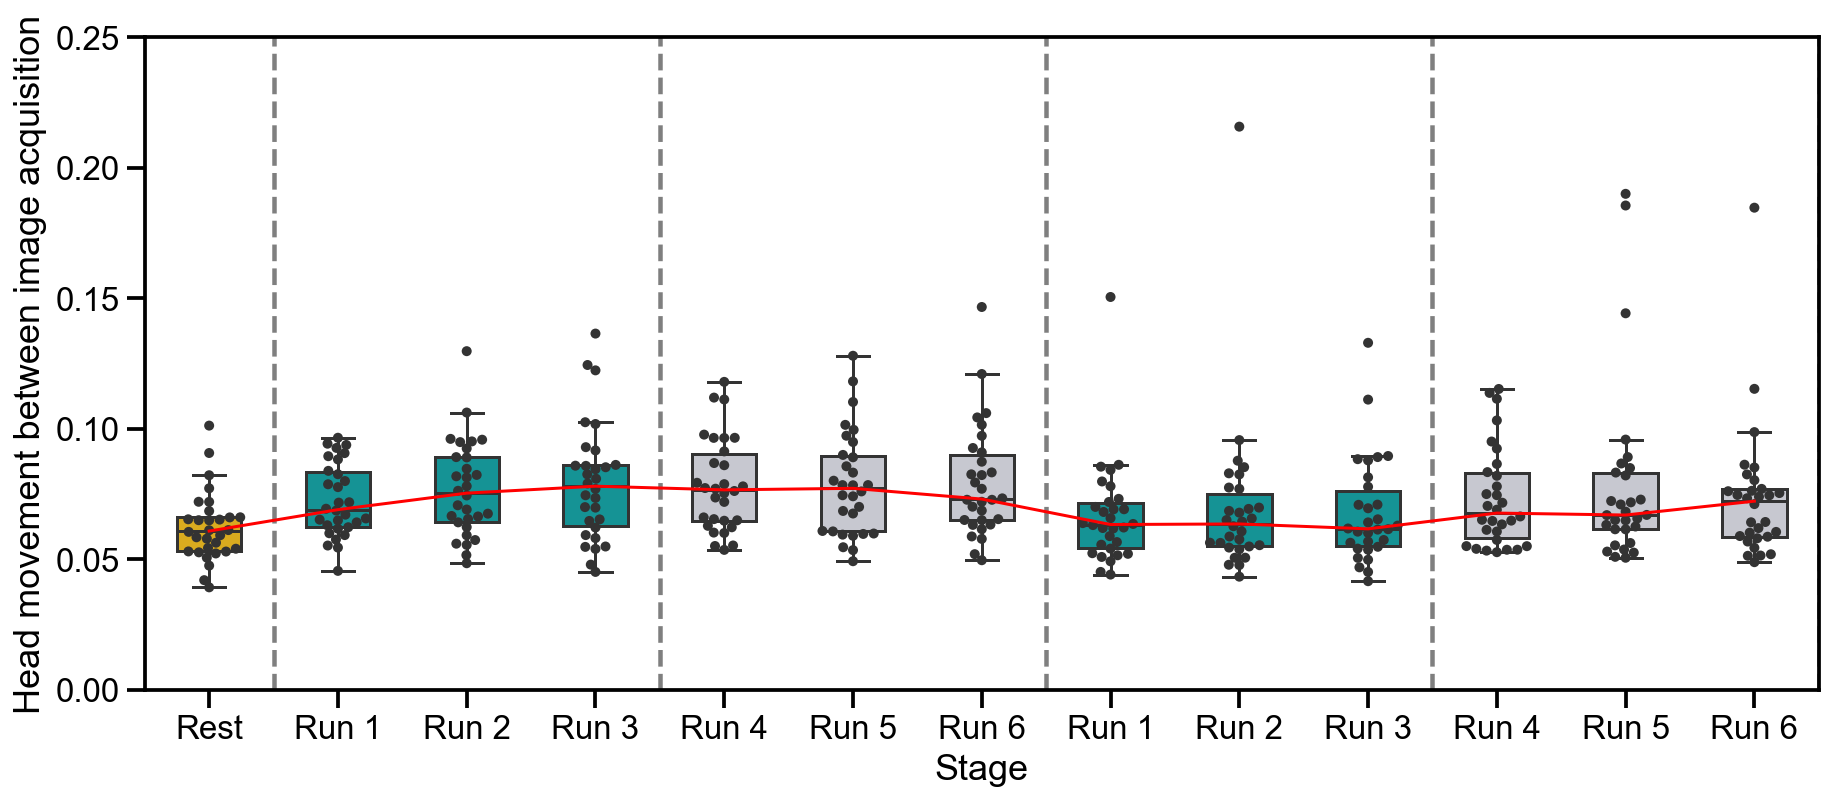

In [118]:
sns.set_context('talk')

fig, ax = plt.subplots(figsize=(15, 6))

sns.swarmplot(data=df, x='Stage', y='Head movement between image acquisition',
              size=5, color="0.2", linewidth=0)

sns.boxplot(data=df, x='Stage', y='Head movement between image acquisition',
            palette=palette, ax=ax, showfliers=False, linewidth=1.5, width=0.5)

plt.plot([i for i in range(13)], 
         df.groupby(['Stage']).median()['Head movement between image acquisition'],
         zorder=10, color='#FF0000', linewidth=1.5)

plt.plot((0.5, 0.5), (0, 1), 'k--', alpha=0.5)
plt.plot((3.5, 3.5), (0, 1), 'k--', alpha=0.5)
plt.plot((6.5, 6.5), (0, 1), 'k--', alpha=0.5)
plt.plot((9.5, 9.5), (0, 1), 'k--', alpha=0.5)
plt.plot((12.5, 12.5), (0, 1), 'k--', alpha=0.5)
plt.ylim(0, 0.25)

#plt.tick_params(axis='x', labelrotation=-15)
ax.set_xticklabels(xticklabels)

plt.show()

In [119]:
fig.savefig('20200514_headmotion.png', dpi=300)

In [124]:
rest_enorm = []
task_enorm = []

for subj in ga_subj_list:
    rest_enorm.append(np.mean(enorm_data[subj, 'rest']))
    task_enorm.append(np.mean([enorm_data[subj_rename, run] 
                              for run in range(1, 7) 
                              for subj_rename in [subj, subj.replace('A', 'B')]]))

In [139]:
with open('20200515_mean-enorm_rest_task.csv', 'w') as file:
    for r, t in zip(rest_enorm, task_enorm):
        file.write('%f, %f\n' % (r, t))

In [142]:
with open('20200515_mean-enorm_rest_task_longfmt.csv', 'w') as file:
    file.write('group, subject, enorm\n')
    
    for i, r in enumerate(rest_enorm):
        file.write('%s, %d, %f\n' % ('rest', i, r))
    for i, r in enumerate(task_enorm):
        file.write('%s, %d, %f\n' % ('task', i, r))

In [126]:
scipy.stats.wilcoxon(rest_enorm, task_enorm)

WilcoxonResult(statistic=48.0, pvalue=0.0001477276174888222)

(array([0., 2., 7., 4., 7., 2., 4., 2., 0., 0., 1., 1., 0., 0., 0.]),
 array([0.04      , 0.04733333, 0.05466667, 0.062     , 0.06933333,
        0.07666667, 0.084     , 0.09133333, 0.09866667, 0.106     ,
        0.11333333, 0.12066667, 0.128     , 0.13533333, 0.14266667,
        0.15      ]),
 <a list of 15 Patch objects>)

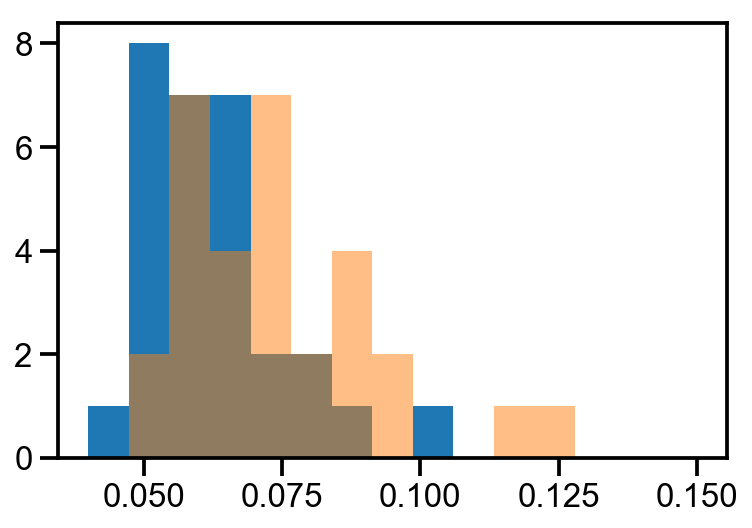

In [138]:
plt.hist(rest_enorm, range=(0.04, 0.15), bins=15)
plt.hist(task_enorm, alpha=0.5, range=(0.04, 0.15), bins=15)

(array([3., 6., 5., 7., 4., 3., 0., 0., 1., 1.]),
 array([0.04862129, 0.05642466, 0.06422804, 0.07203142, 0.0798348 ,
        0.08763818, 0.09544155, 0.10324493, 0.11104831, 0.11885169,
        0.12665507]),
 <a list of 10 Patch objects>)

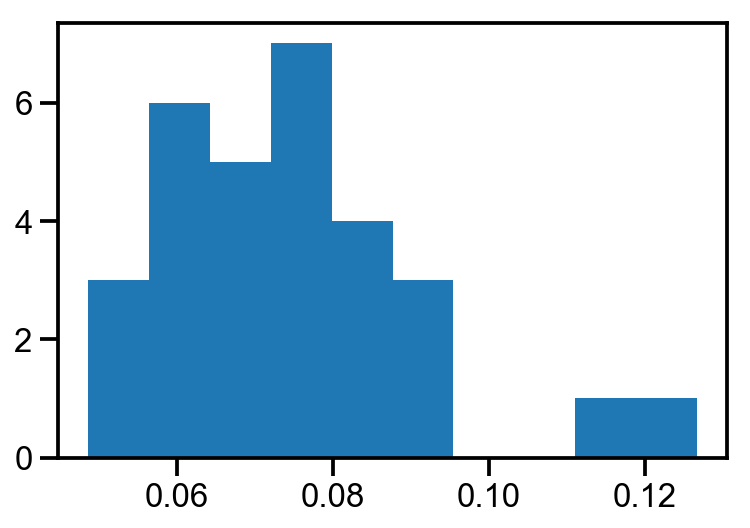

In [129]:
plt.hist(task_enorm)

In [130]:
scipy.stats.ttest_rel(rest_enorm, task_enorm)

Ttest_relResult(statistic=-4.827391131454205, pvalue=4.097903944465151e-05)

In [135]:
scipy.stats.ttest_ind(rest_enorm, task_enorm)

Ttest_indResult(statistic=-3.044980558791223, pvalue=0.0034963325913732438)